## INTRODUCTION

<font color='red'>Content:</font>

- [Matrix and Box Plots (Missingno)](#1)
- [Parallel Plots (Pandas)](#2)
- [Network Charts (Networkx)](#3)
- [Venn (Matplotlib)](#4)
- [Donut (Matplotlib)](#5)
- [Spider Chart (Matplotlib)](#6)
- [Cluster Map (Seaborn)](#7)
- [Inset Plots (Plotly)](#8)
- [Basic 3D Scatter Plot (Plotly)](#9)
- [Earthquare Animation (Plotly)](#10)

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
from math import pi
from pandas.plotting import autocorrelation_plot
import plotly.graph_objs as go
import plotly.plotly as py
from pandas.plotting import parallel_coordinates
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("Iris Species"))

# Any results you write to the current directory are saved as output.

['database.sqlite', 'Iris.csv']


### <a name="1"></a>Matrix and Bar Plots (Missingno)
- In data analysis, one of the first steps is cleaning messy datasets and missing values.
- In order to explore whether data has missign value or not, I always use .info() method from pandas library. It gives a lot of information.
- Visualization is always attractive for people. Therefore, if we can visualize missign values, it can be better understandable.
- In order to visualize missign data, we can use missigno package.
- Lets create pandas dataframe that includes missign values (NaN) and visualize it.
    - Dictionary: One of the methods of creating data frame is first creating dictionary then put it into pd.DataFrame
    - data_missingno: Data frame that we will use in this example
    import missingno as msno: import missingno library and define as msno (shortcut)
    - matrix(): Create matrix. Number of rows is number of sample and number of columns is number of features(column1, column2, column3) in data_missingno.
    - show(): shows the plot
- The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.
- Missign values are white and non missign values are black in plot.
- It can be seen from plot column1 does not have missign value. Column2 has five missign values and column3 has three missign values.

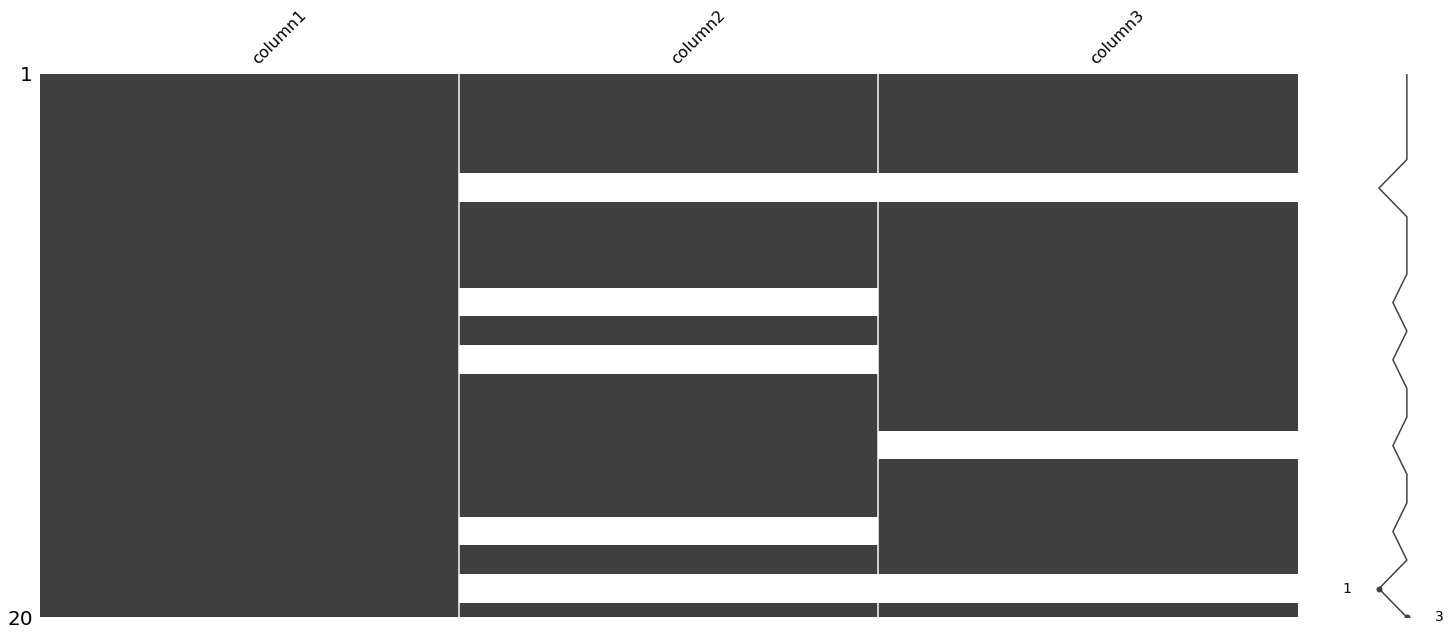

In [7]:
# Define dictionary
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
# Create data frame from dictionary
data_missingno = pd.DataFrame(dictionary) 

# import missingno library
import missingno as msno
msno.matrix(data_missingno)
plt.show()

- Apart from matrix plot we can use bar plot to observe missign values.
- Bar is a simple visualization of nullity by column.
- Numbers at left side of plot is percentage.
- Numbers at top of the plot is number of non missign values
- Numbers at right side of plot is number of sample in data.

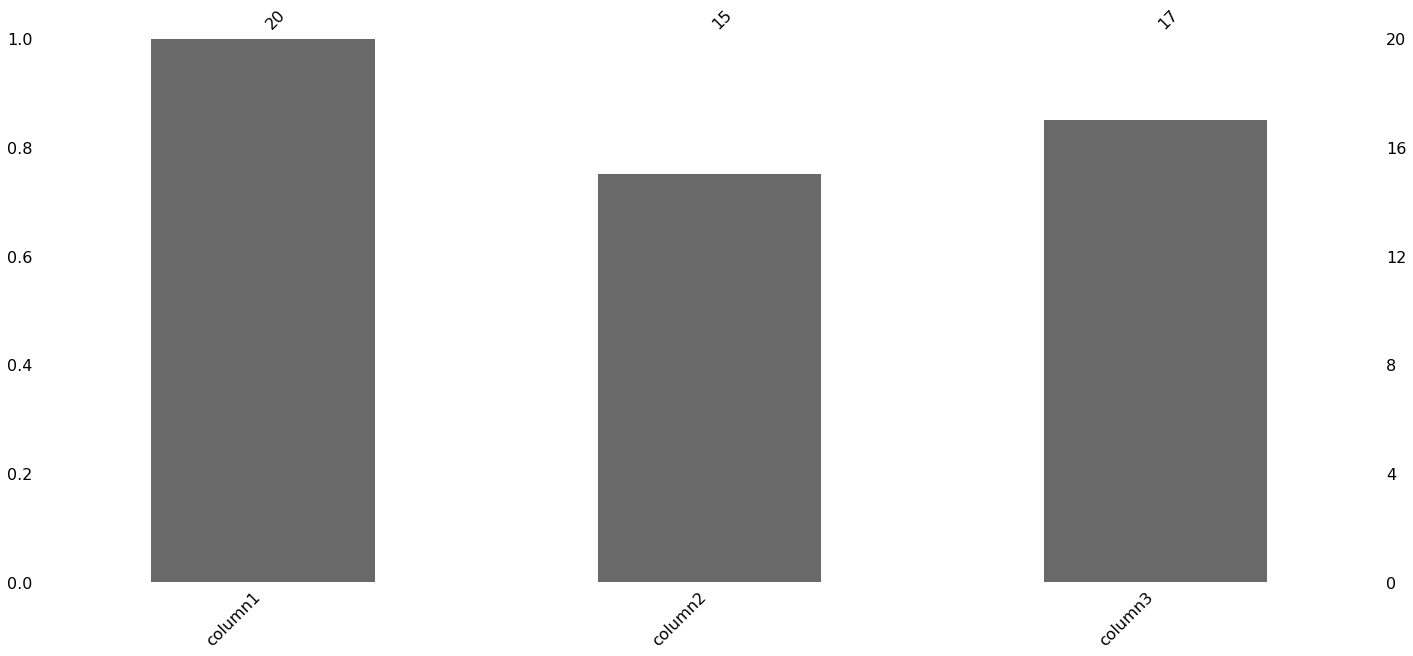

In [8]:
# missingno bar plot
msno.bar(data_missingno)
plt.show()

### <a name="2"></a>Parallel Plots (Pandas)
- In order to learn parallel plots, we will use famous iris data set from sklearn library
- Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.
- Each vertical bar represents a feature(column or variable) like petal length (cm).
- Values are then plotted as series of lines connected across each axis.
- Different colors shows different classes like setosa.
- Parallel plot allow to detect interesting patterns. For example as you can see we can easily classify setosa according to petal width (cm) feature.
- Lets look at code.
    - Load iris data into data frame
    - parallel_coordinates: we import parallel_coordinates from pandas library
    - colormap: color map that paints classes with different colors

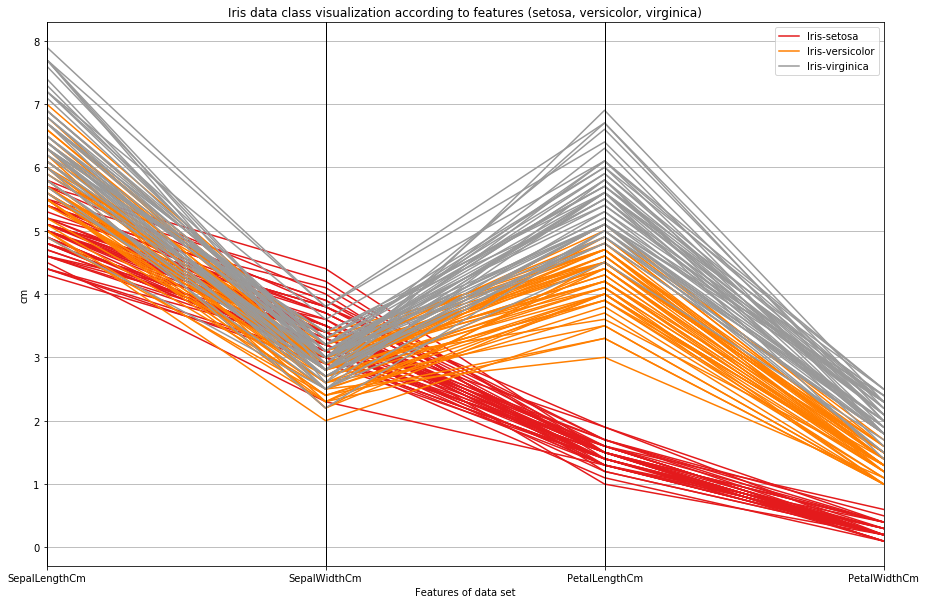

In [11]:
# load iris data
data = pd.read_csv('Iris Species/Iris.csv')
data = data.drop(['Id'],axis=1)
# Make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

### <a name="3"></a>Network Charts (Networkx)
- We will use iris data that we import at previous part( parallel plot)
- Network charts are related with correlation network.
- It can be used instead of heatmaps in seaborn library.
- At first look at correlation between features.
    - corr(): gives correlation between features
    - As you can see from table below, petal length is positively correlated with sepal length and petal width. Also, petal length is negatively correlated with sepal width.

In [12]:
# Calculate the correlation between individuals.
corr = data.iloc[:,0:4].corr()
corr

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

### <a name="4"></a>Venn (Matplotlib)
You can use venn diagram to visualize the size of groups and their intersection.

In [19]:
data.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

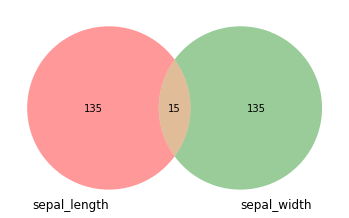

In [20]:
# venn2
from matplotlib_venn import venn2
sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]
petal_length = data.iloc[:,2]
petal_width = data.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

### <a name="5"></a>Donut (Matplotlib)
A donut chart is a pie chart with an area of the center cut out.

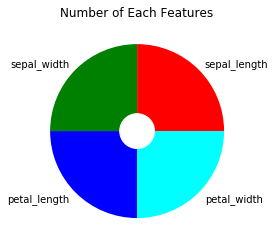

In [21]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

### <a name="6"></a>Spider Chart (Matplotlib)
A spider(radar) plot is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables.

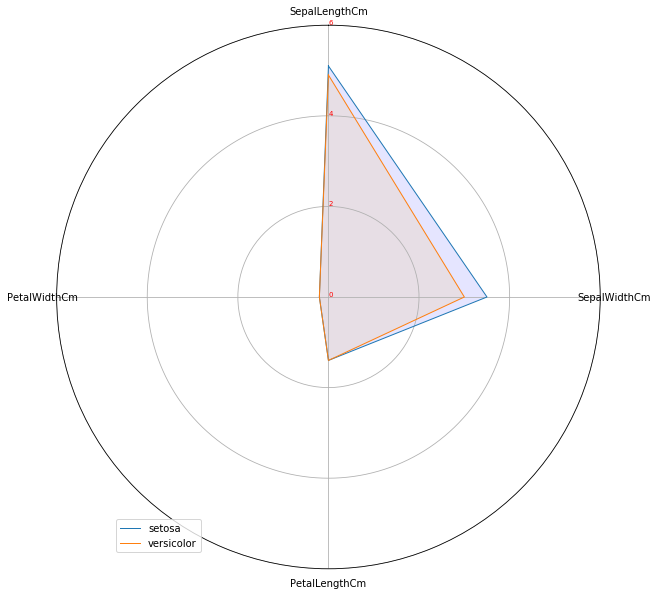

In [22]:
# spider graph
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

### <a name="7"></a>Cluster Map (Seaborn)
- Plot a matrix dataset as a hierarchically-clustered heatmap.

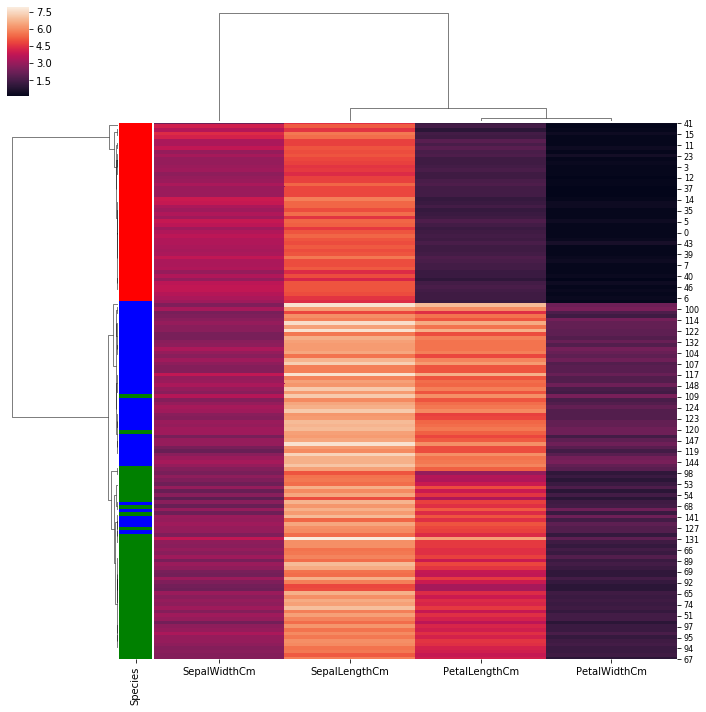

In [23]:
# cluster map (dendogram and tree)
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = data.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

### <a name="8"></a>Inset Plots (Plotly)
If you do not understand the code check my plotly tutorial.

In [24]:
# trace1 is line plot
# go: graph object
trace1 = go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "SepalLengthCm",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.75,
    name = "Sepal Length(Cm)",
    marker=dict(color='rgba(10, 200, 250, 0.6)'))

# add trace1 and trace2
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' Sepal Length(Cm) Histogram and Scatter Plot'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### <a name="9"></a>Basic 3D Scatter Plot (Plotly)
- import data again to avoid confusion
- go.Scatter3d: 3D scatter
- We will plot iris setosa and iris virginica classes according to their Sepal Length(x), Sepal Width(y), and Petal Length(z).

In [26]:
# import data again
data = pd.read_csv('Iris Species/Iris.csv')
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### <a name="10"></a>Earthquake Animation

In [27]:
os.listdir()

['.ipynb_checkpoints',
 'dv_boreh.ipynb',
 'dv_plotly.ipynb',
 'dv_rare_visualization.ipynb',
 'dv_seaborn.ipynb',
 'earthquakes.csv',
 'Fatal Police Shootings in the US',
 'graph.png',
 'Iris Species',
 'my_first_bokeh_plot.html',
 'Video Game Sales']

In [28]:
data = pd.read_csv("earthquakes.csv")
data = data.drop([3378,7512,20650])
data["year"]= [int(each.split("/")[2]) for each in data.iloc[:,0]]

In [29]:
data.head()


Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Azimuthal Gap  \
0                     NaN        6.0             MW  ...            NaN   
1                     NaN        5.8             MW  ...            NaN   
2                     NaN        6.2             MW  ...            NaN   
3                     NaN        5.8             MW  ...            NaN   
4                     NaN        5.8             MW  ...            NaN   

   Horizontal Distance  Horizontal Error  Root Mean Square            ID  \
0                  NaN               NaN               NaN  ISCGEM860706   
1                  NaN               NaN               NaN  ISCGEM860737   
2                  NaN               NaN               NaN  ISCGEM860762   
3                  NaN               NaN               NaN  ISCGEM860856   
4                  NaN               NaN               NaN  ISCGEM860890   

   Source Location Source Magnitude Source     Status  year  
0  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
1  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
2  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
3  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
4  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  

[5 rows x 22 columns]

In [30]:
data.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [31]:
dataset = data.loc[:,["Date","Latitude","Longitude","Type","Depth","Magnitude","year"]]
dataset.head()

Date  Latitude  Longitude        Type  Depth  Magnitude  year
0  01/02/1965    19.246    145.616  Earthquake  131.6        6.0  1965
1  01/04/1965     1.863    127.352  Earthquake   80.0        5.8  1965
2  01/05/1965   -20.579   -173.972  Earthquake   20.0        6.2  1965
3  01/08/1965   -59.076    -23.557  Earthquake   15.0        5.8  1965
4  01/09/1965    11.938    126.427  Earthquake   15.0        5.8  1965

In [32]:
years = [str(each) for each in list(data.year.unique())]  # str unique years
# make list of types
types = ['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst']
custom_colors = {
    'Earthquake': 'rgb(189, 2, 21)',
    'Nuclear Explosion': 'rgb(52, 7, 250)',
    'Explosion': 'rgb(99, 110, 250)',
    'Rock Burst': 'rgb(0, 0, 0)'
}
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

figure['layout']['geo'] = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, 
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1965',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 1695
for ty in types:
    dataset_by_year = dataset[dataset['year'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Type'] == ty]
    
    data_dict = dict(
    type='scattergeo',
    lon = dataset['Longitude'],
    lat = dataset['Latitude'],
    hoverinfo = 'text',
    text = ty,
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = custom_colors[ty],
        opacity = 0.7),
)
    figure['data'].append(data_dict)
    
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for ty in types:
        dataset_by_year = dataset[dataset['year'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Type'] == ty]

        data_dict = dict(
                type='scattergeo',
                lon = dataset_by_year_and_cont['Longitude'],
                lat = dataset_by_year_and_cont['Latitude'],
                hoverinfo = 'text',
                text = ty,
                mode = 'markers',
                marker=dict(
                    sizemode = 'area',
                    sizeref = 1,
                    size= 10 ,
                    line = dict(width=1,color = "white"),
                    color = custom_colors[ty],
                    opacity = 0.7),
                name = ty
            )
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure["layout"]["autosize"]= True
figure["layout"]["title"] = "Earthquake"       

figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

## Conclusion
- Also there are other visualization tutorials:
    - Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    - Plotly: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
    - Seaborn: https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners